### This example shows how to plot time series data

In [1]:
import sys
sys.dont_write_bytecode = True
sys.path.append('../')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import plot_utils as pu

In [4]:
%matplotlib inline

### Data: unemployment rate of California, Texas, and Maryland (2007 to 2017)

Firstly, create a string array containing all the dates.

In [5]:
year_range = range(2007,2017)  # from 2007 to 2016
date = []
for i in range(len(year_range)):
    for j in range(12):  # repeat 12 times for each year
        date.append(str(year_range[i]) + '-' + str(j+1).zfill(2))
for j in range(8):  # from January, 2017 to August, 2017
    date.append('2017' + '-' + str(j+1).zfill(2))

In [6]:
date[:5]

['2007-01', '2007-02', '2007-03', '2007-04', '2007-05']

Then, unemployment rate data for the three states. Data source: https://www.bls.gov/eag/ (last accessed: October, 2017)

In [7]:
unempl_CA = [5, 5, 5.1, 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.8, 5.9, 6, 6.1, 6.2, 6.4, 6.6, 
             6.9, 7.2, 7.5, 7.8, 8.1, 8.5, 8.9, 9.3, 9.8, 10.3, 10.6, 10.9, 11.2, 11.3, 
             11.5, 11.6, 11.8, 11.9, 12, 12.1, 12.1, 12.2, 12.2, 12.2, 12.1, 12.1, 12.1,
             12.1, 12.2, 12.2, 12.1, 12.1, 12, 11.9, 11.8, 11.7, 11.7, 11.7, 11.7, 11.6, 
             11.5, 11.3, 11.2, 11, 10.9, 10.8, 10.7, 10.7, 10.6, 10.4, 10.3, 10.1, 9.9, 
             9.8, 9.7, 9.6, 9.5, 9.3, 9.2, 9.1, 9, 8.9, 8.8, 8.7, 8.6, 8.5, 8.3, 8.2, 
             8.1, 8, 7.9, 7.7, 7.6, 7.5, 7.4, 7.3, 7.2, 7.1, 7, 6.9, 6.8, 6.6, 6.5, 6.4, 
             6.3, 6.2, 6.1, 6, 5.9, 5.8, 5.8, 5.7, 5.7, 5.6, 5.6, 5.5, 5.5, 5.5, 5.4, 5.4, 
             5.3, 5.3, 5.3, 5.2, 5.2, 5, 4.9, 4.8, 4.7, 4.7, 4.8, 5.1]

In [8]:
unempl_TX = [4.4, 4.3, 4.3, 4.2, 4.2, 4.2, 4.2, 4.3, 4.3, 4.3, 4.3, 4.3, 4.3, 4.3, 4.4, 
             4.4, 4.5, 4.7, 4.8, 5, 5.1, 5.3, 5.6, 5.8, 6.1, 6.3, 6.5, 6.7, 7.6, 8.1, 
             8.3, 8.4, 8.4, 8.4, 8.3, 8.3, 8.3, 8.3, 8.3, 8.2, 8.1, 8, 8, 8, 8, 8, 8, 
             8, 8, 7.9, 7.8, 7.8, 7.8, 7.8, 7.8, 7.7, 7.6, 7.5, 7.3, 7.2, 7.1, 7, 6.9, 
             6.8, 6.8, 6.7, 6.6, 6.5, 6.4, 6.4, 6.4, 6.4, 6.4, 6.4, 6.4, 6.3, 6.3, 6.2, 
             6.1, 6, 5.9, 5.9, 5.8, 5.7, 5.6, 5.5, 5.4, 5.3, 5.2, 5.1, 5, 4.9, 4.8, 4.7, 
             4.6, 4.5, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.5, 4.5, 4.5, 4.5, 4.5, 
             4.6, 4.6, 4.6, 4.7, 4.7, 4.7, 4.7, 4.7, 4.8, 4.8, 4.8, 4.8, 4.9, 5, 5, 4.8, 
             4.6, 4.3, 4.2]

In [9]:
unempl_MD = [3.7, 3.6, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.4, 3.4, 3.5, 3.6, 3.7, 
             3.9, 4.1, 4.3, 4.6, 4.8, 5.1, 5.5, 5.8, 6.2, 6.5, 6.8, 6.9, 7, 7.1, 7.2, 7.2, 
             7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.7, 7.7, 7.6, 7.6, 7.5, 7.5, 7.5, 7.5, 7.4, 7.4, 
             7.3, 7.2, 7.2, 7.2, 7.2, 7.2, 7.2, 7.2, 7.2, 7.1, 7, 7, 6.9, 6.9, 6.9, 6.9, 6.9, 
             6.9, 6.9, 6.9, 6.9, 6.9, 6.8, 6.8, 6.8, 6.8, 6.8, 6.7, 6.7, 6.6, 6.5, 6.4, 6.4, 
             6.3, 6.2, 6.1, 6, 6, 5.9, 5.9, 5.9, 5.8, 5.8, 5.7, 5.6, 5.6, 5.5, 5.5, 5.4, 5.4, 
             5.3, 5.2, 5.1, 5.1, 5, 4.9, 4.9, 4.8, 4.7, 4.7, 4.6, 4.5, 4.4, 4.4, 4.3, 4.3, 4.3, 
             4.2, 4.2, 4.2, 4.2, 4.2, 4.2, 4.2, 4.2, 4.3, 4.2, 4.1, 4, 3.9]

In [10]:
CA = pd.Series(data=unempl_CA, index=date)
TX = pd.Series(data=unempl_TX, index=date)
MD = pd.Series(data=unempl_MD, index=date)
df = pd.DataFrame(data=unempl_CA, index=date, columns=['CA'])
df['TX'] = unempl_TX
df['MD'] = unempl_MD

In [11]:
df.head()

,CA,TX,MD
2007-01,5.0,4.4,3.7
2007-02,5.0,4.3,3.6
2007-03,5.1,4.3,3.5
2007-04,5.1,4.2,3.5
2007-05,5.2,4.2,3.5


### Plot California unemployment rate over time

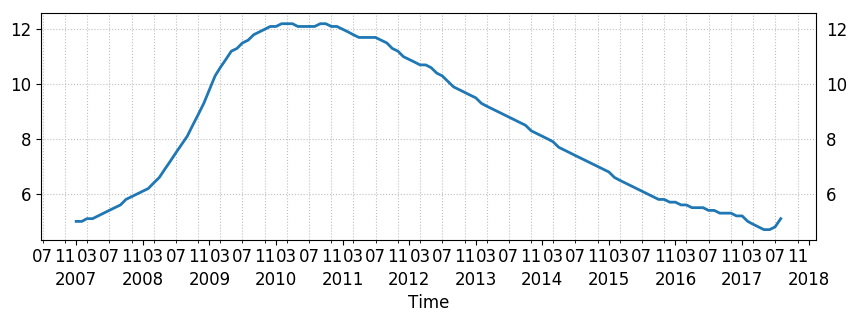

In [12]:
pu.plot_timeseries(CA);  # with all other arguments by default

### Plot Texas unemployment rate over time

With a lot of (but not all) keyword arguments:

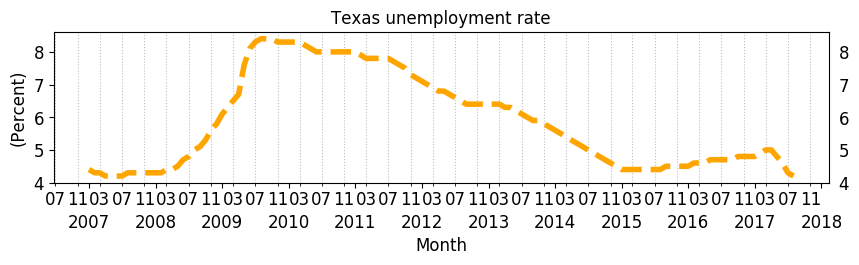

In [13]:
pu.plot_timeseries(TX,figsize=(10,2),xlabel='Month',ylabel='(Percent)',ygrid_on=False,
                   color='orange',lw=4,ls='--',title='Texas unemployment rate');

### Plot three states together

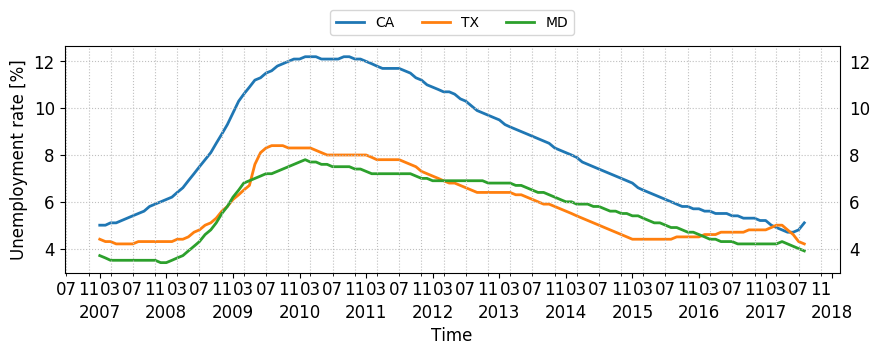

In [14]:
pu.plot_multiple_timeseries(df,ylabel='Unemployment rate [%]',figsize=(10,3));  # many other keyword arguments can be customized

### Plot time series with shaded upper/lower bounds

Simplistically, just use a constant error margin ('2') around CA unemployment rate:

In [15]:
ub = CA + 2  # upper bound
lb = CA - 2  # lower bound

In [16]:
ub.head()

2007-01    7.0
2007-02    7.0
2007-03    7.1
2007-04    7.1
2007-05    7.2
dtype: float64

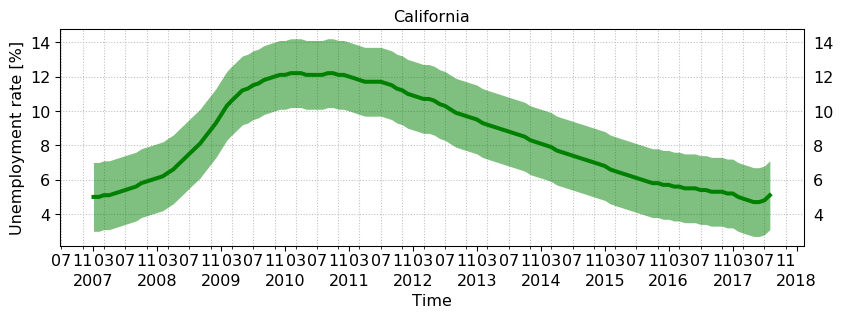

In [17]:
pu.fill_timeseries(CA,ub,lb,color='green',ylabel='Unemployment rate [%]',title='California');

Note: since plotting error bounds makes the graph more busy, plotting multiple time series (e.g., CA, TX, and MD) with shaded bounds are not encouraged (hence not supported).